In [ ]:
pip install pytesseract

In [ ]:
!sudo apt-get install -y tesseract-ocr-nep


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-nep tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 5,295 kB of archives.
After this operation, 16.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-nep all 1:4.00~git30-7274cfa-1.1 [478 kB]
Fetched 5,295 kB in 0s (29.8 MB/s)
debconf: unable to init

In [ ]:
import cv2
from matplotlib import pyplot as plt

img_path = '/content/IMG_20210722_082752.jpg'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [ ]:
def display(images):
  plt.imshow(images)
  plt.show()

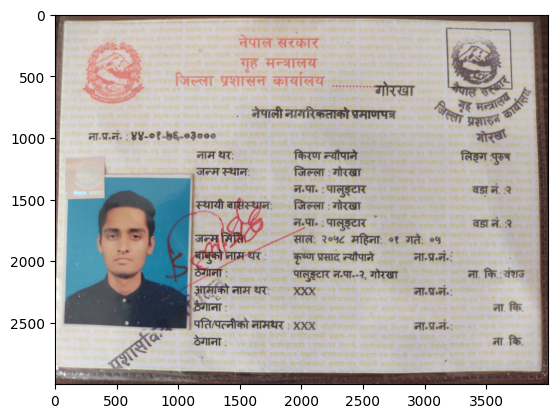

In [ ]:
#Display original image
display(img_rgb)

In [ ]:
#Inverted Image
image = img_rgb.copy()
# inverted_image= cv2.bitwise_not(image)
# display(inverted_image)


In [43]:
from google.colab.patches import cv2_imshow
import pytesseract

bbox = img_rgb.copy()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (9, 9), 0)

enhanced = cv2.addWeighted(blur, 1.5, gray, -0.5, 0)

adaptive_thresh = cv2.adaptiveThreshold(
    enhanced, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 45, 12
)
# cv2_imshow(adaptive_thresh)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
dilate = cv2.dilate(adaptive_thresh,kernel, iterations=1)

# cv2_imshow(dilate)

config = "--psm 4 --oem 3"
lang = "nep"

results = []

# Filter contours based on area
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])
contours = cnts
for c in cnts:
  x, y, w, h = cv2.boundingRect(c)
  if w > 5 and h > 5:
    final = cv2.rectangle(bbox,(x,y),(x+w,y+h),(36, 255, 12), 2)
    ocr_result = pytesseract.image_to_string(final, config=config, lang=lang)
    ocr_result = ocr_result.split("\n")
    for item in ocr_result:
      results.append(item)

cv2_imshow(final)

print(results)